# Covariance Functions and Hyperparameter Optimization

### Neil D. Lawrence

**Abstract**: In this talk we review covariance functions and
optimization of the GP log likelihoood.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->
<!-- To compile -->

In [ ]:
%pip install gpy

## GPy: A Gaussian Process Framework in Python

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/gpy-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/gpy-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Gaussian processes are a flexible tool for non-parametric analysis with
uncertainty. The GPy software was started in Sheffield to provide a easy
to use interface to GPs. One which allowed the user to focus on the
modelling rather than the mathematics.

<img class="" src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/gpy.png" style="width:70%">

Figure: <i>GPy is a BSD licensed software code base for implementing
Gaussian process models in Python. It is designed for teaching and
modelling. We welcome contributions which can be made through the GitHub
repository <https://github.com/SheffieldML/GPy></i>

GPy is a BSD licensed software code base for implementing Gaussian
process models in python. This allows GPs to be combined with a wide
variety of software libraries.

The software itself is available on
[GitHub](https://github.com/SheffieldML/GPy) and the team welcomes
contributions.

The aim for GPy is to be a probabilistic-style programming language,
i.e., you specify the model rather than the algorithm. As well as a
large range of covariance functions the software allows for non-Gaussian
likelihoods, multivariate outputs, dimensionality reduction and
approximations for larger data sets.

The documentation for GPy can be found
[here](https://gpy.readthedocs.io/en/latest/).

## The Importance of the Covariance Function

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-covariance-function-importance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-covariance-function-importance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The covariance function encapsulates our assumptions about the data. The
equations for the distribution of the prediction function, given the
training observations, are highly sensitive to the covariation between
the test locations and the training locations as expressed by the matrix
$\mathbf{K}_*$. We defined a matrix $\mathbf{A}$ which allowed us to
express our conditional mean in the form, $$
\boldsymbol{ \mu}_f= \mathbf{A}^\top \mathbf{ y},
$$ where $\mathbf{ y}$ were our *training observations*. In other words
our mean predictions are always a linear weighted combination of our
*training data*. The weights are given by computing the covariation
between the training and the test data ($\mathbf{K}_*$) and scaling it
by the inverse covariance of the training data observations,
$\left[\mathbf{K}+ \sigma^2 \mathbf{I}\right]^{-1}$. This inverse is the
main computational object that needs to be resolved for a Gaussian
process. It has a computational burden which is $O(n^3)$ and a storage
burden which is $O(n^2)$. This makes working with Gaussian processes
computationally intensive for the situation where $n>10,000$.

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ewJ3AxKclOg')

Figure: <i>Introduction to Gaussian processes given by Neil Lawrence at
the 2014 Gaussian process Winter School at the University of
Sheffield.</i>

## Improving the Numerics

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-numerics-and-optimization.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-numerics-and-optimization.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In practice we shouldn’t be using matrix inverse directly to solve the
GP system. One more stable way is to compute the *Cholesky
decomposition* of the kernel matrix. The log determinant of the
covariance can also be derived from the Cholesky decomposition.

In [ ]:
import mlai

In [ ]:
%load -n mlai.update_inverse

In [ ]:
GP.update_inverse = update_inverse

## Capacity Control

Gaussian processes are sometimes seen as part of a wider family of
methods known as kernel methods. Kernel methods are also based around
covariance functions, but in the field they are known as Mercer kernels.
Mercer kernels have interpretations as inner products in potentially
infinite dimensional Hilbert spaces. This interpretation arises because,
if we take $\alpha=1$, then the kernel can be expressed as $$
\mathbf{K}= \boldsymbol{ \Phi}\boldsymbol{ \Phi}^\top 
$$ which imples the elements of the kernel are given by, $$
k(\mathbf{ x}, \mathbf{ x}^\prime) = \boldsymbol{ \phi}(\mathbf{ x})^\top \boldsymbol{ \phi}(\mathbf{ x}^\prime).
$$ So we see that the kernel function is developed from an inner product
between the basis functions. Mercer’s theorem tells us that any valid
*positive definite function* can be expressed as this inner product but
with the caveat that the inner product could be *infinite length*. This
idea has been used quite widely to *kernelize* algorithms that depend on
inner products. The kernel functions are equivalent to covariance
functions and they are parameterized accordingly. In the kernel modeling
community it is generally accepted that kernel parameter estimation is a
difficult problem and the normal solution is to cross validate to obtain
parameters. This can cause difficulties when a large number of kernel
parameters need to be estimated. In Gaussian process modelling kernel
parameter estimation (in the simplest case proceeds) by maximum
likelihood. This involves taking gradients of the likelihood with
respect to the parameters of the covariance function.

## Gradients of the Likelihood

The easiest conceptual way to obtain the gradients is a two step
process. The first step involves taking the gradient of the likelihood
with respect to the covariance function, the second step involves
considering the gradient of the covariance function with respect to its
parameters.

## Overall Process Scale

In general we won’t be able to find parameters of the covariance
function through fixed point equations, we will need to do gradient
based optimization.

## Capacity Control and Data Fit

The objective function can be decomposed into two terms, a capacity
control term, and a data fit term. The capacity control term is the log
determinant of the covariance. The data fit term is the matrix inner
product between the data and the inverse covariance.

In [ ]:
def rotateObject(rotationMatrix, handle):
for i = 1:prod(size(handle))
    type = get(handle(i), 'type');
    if strcmp(type, 'text'):
        xy = get(handle(i), 'position');
        xy(1:2) = rotationMatrix*xy(1:2)';
        set(handle(i), 'position', xy);
    else:
        xd = get(handle(i), 'xdata');
        yd = get(handle(i), 'ydata');
        new = rotationMatrix*[xd(:)'; yd(:)'];
        set(handle(i), 'xdata', new(1, :));
        set(handle(i), 'ydata', new(2, :));

## Learning Covariance Parameters

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-optimize.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-optimize.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Can we determine covariance parameters from the data?

$$
\mathcal{N}\left(\mathbf{ y}|\mathbf{0},\mathbf{K}\right)=\frac{1}{(2\pi)^\frac{n}{2}{\det{\mathbf{K}}^{\frac{1}{2}}}}{\exp\left(-\frac{\mathbf{ y}^{\top}\mathbf{K}^{-1}\mathbf{ y}}{2}\right)}
$$

$$
\begin{aligned}
    \mathcal{N}\left(\mathbf{ y}|\mathbf{0},\mathbf{K}\right)=\frac{1}{(2\pi)^\frac{n}{2}\color{blue}{\det{\mathbf{K}}^{\frac{1}{2}}}}\color{red}{\exp\left(-\frac{\mathbf{ y}^{\top}\mathbf{K}^{-1}\mathbf{ y}}{2}\right)}
\end{aligned}
$$

$$
\begin{aligned}
    \log \mathcal{N}\left(\mathbf{ y}|\mathbf{0},\mathbf{K}\right)=&\color{blue}{-\frac{1}{2}\log\det{\mathbf{K}}}\color{red}{-\frac{\mathbf{ y}^{\top}\mathbf{K}^{-1}\mathbf{ y}}{2}} \\ &-\frac{n}{2}\log2\pi
\end{aligned}
$$

$$
E(\boldsymbol{ \theta}) = \color{blue}{\frac{1}{2}\log\det{\mathbf{K}}} + \color{red}{\frac{\mathbf{ y}^{\top}\mathbf{K}^{-1}\mathbf{ y}}{2}}
$$

## Capacity Control through the Determinant

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-optimize-capacity.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-optimize-capacity.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The parameters are *inside* the covariance function (matrix).
$$k_{i, j} = k(\mathbf{ x}_i, \mathbf{ x}_j; \boldsymbol{ \theta})$$

$$\mathbf{K}= \mathbf{R}\boldsymbol{ \Lambda}^2 \mathbf{R}^\top$$

<table>
<tr>
<td width="50%">

<img class="negate" src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/gp-optimize-eigen.png" style="width:100%">

</td>
<td width="50%">

$\boldsymbol{ \Lambda}$ represents distance on axes. $\mathbf{R}$ gives
rotation.

</td>
</tr>
</table>

-   $\boldsymbol{ \Lambda}$ is *diagonal*,
    $\mathbf{R}^\top\mathbf{R}= \mathbf{I}$.
-   Useful representation since
    $\det{\mathbf{K}} = \det{\boldsymbol{ \Lambda}^2} = \det{\boldsymbol{ \Lambda}}^2$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mlai
import mlai.plot as plot

In [ ]:
plot.covariance_capacity(rotate_angle=np.pi/4, lambda1 = 0.5, lambda2 = 0.3, diagrams = './gp/')

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
nu.display_plots('gp-optimise-determinant{sample:0>3}.svg', 
                            './gp', 
                            sample=IntSlider(0, 0, 9, 1))

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/gp-optimise-determinant009.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The determinant of the covariance is dependent only on the
eigenvalues. It represents the ‘footprint’ of the Gaussian.</i>

## Quadratic Data Fit

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-optimize-data-fit.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-optimize-data-fit.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
    clf
    includeText = [];
    counter = 0;
    plotWidth = 0.6*textWidth;
    lambda1 = 3;
    lambda2 = 1;
    t = linspace(-pi, pi, 200);
    R = [sqrt(2)/2 -sqrt(2)/2; sqrt(2)/2 sqrt(2)/2];
    xy = [lambda1*sin(t); lambda2*cos(t)];
    contourHand = line(xy(1, :), xy(2, :), 'color', blackColor);
    xy = [lambda1*sin(t); lambda2*cos(t)]*2;
    lim = [-1 1]*max([lambda1 lambda2])*2.2;
    set(gca, 'xlim', lim, 'ylim', lim)
    axis equal


    contourHand = [contourHand line(xy(1, :), xy(2, :), 'color', blackColor)];
    set(contourHand, 'linewidth', 2, 'color', redColor)
    arrowHand = arrow([0 lambda1], [0 0]);
    arrowHand = [arrowHand arrow([0 0], [0 lambda2])];
    set(arrowHand, 'linewidth', 3, 'color', blackColor);
    xlim = get(gca, 'xlim');
    xspan = xlim(2) - xlim(1);
    ylim = get(gca, 'ylim');
    yspan = ylim(2) - ylim(1);
    eigLabel = text(lambda1*0.5, -yspan*0.05, '$\eigenvalue_1$', 'horizontalalignment', 'center');
    eigLabel = [eigLabel text(-0.05*xspan, lambda2*0.5, '$\eigenvalue_2$', 'horizontalalignment', 'center')];
    xlabel('$\dataScalar_1$')
    ylabel('$\dataScalar_2$')
    
    box off
    xlim = get(gca, 'xlim');
    ylim = get(gca, 'ylim');
    line([xlim(1) xlim(1)], ylim, 'color', blackColor)
    line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
    
    fileName = ['gpOptimiseQuadratic' num2str(counter)];
    printLatexPlot(fileName, directory, plotWidth);
    includeText = [includeText '\only<' num2str(counter) '>{\input{' directory fileName '.svg}}'];
    counter = counter + 1;

    y = [1.2 1.4];
    dataHand = line(y(1), y(2), 'marker', 'x', 'markersize', markerSize, 'linewidth', markerWidth, 'color', blackColor);
    
    fileName = ['gpOptimiseQuadratic' num2str(counter)];
    printLatexPlot(fileName, directory, plotWidth);
    includeText = [includeText '\only<' num2str(counter) '>{\input{' directory fileName '.svg}}'];
    counter = counter + 1;

    
    rotateObject(rotationMatrix, arrowHand);
    rotateObject(rotationMatrix, contourHand);
    rotateObject(rotationMatrix, eigLabel);
    
    fileName = ['gpOptimiseQuadratic' num2str(counter)];
    printLatexPlot(fileName, directory, plotWidth);
    includeText = [includeText '\only<' num2str(counter) '>{\input{' directory fileName '.svg}}'];
    counter = counter + 1;
    
    printLatexText(includeText, 'gpOptimiseQuadraticIncludeText.tex', directory)

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/gp-optimise-quadratic002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The data fit term of the Gaussian process is a quadratic loss
centered around zero. This has eliptical contours, the principal axes of
which are given by the covariance matrix.</i>

## Data Fit Term

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-optimize-data-fit-capacity.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-optimize-data-fit-capacity.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
import GPy
import mlai.plot as plot
import mlai
import gp_tutorial

In [ ]:
np.random.seed(125)
diagrams = './gp'

black_color=[0., 0., 0.]
red_color=[1., 0., 0.]
blue_color=[0., 0., 1.]
magenta_color=[1., 0., 1.]
fontsize=18

In [ ]:
y_lim = [-2.2, 2.2]
y_ticks = [-2, -1, 0, 1, 2]
x_lim = [-2, 2]
x_ticks = [-2, -1, 0, 1, 2]
err_y_lim = [-12, 20]

linewidth=3
markersize=15
markertype='.'

In [ ]:
x = np.linspace(-1, 1, 6)[:, np.newaxis]
xtest = np.linspace(x_lim[0], x_lim[1], 200)[:, np.newaxis]

# True data
true_kern = GPy.kern.RBF(1) + GPy.kern.White(1)
true_kern.rbf.lengthscale = 1.0
true_kern.white.variance = 0.01
K = true_kern.K(x) 
y = np.random.multivariate_normal(np.zeros((6,)), K, 1).T

In [ ]:
# Fitted model
kern = GPy.kern.RBF(1) + GPy.kern.White(1)
kern.rbf.lengthscale = 1.0
kern.white.variance = 0.01

lengthscales = np.asarray([0.01, 0.05, 0.1, 0.25, 0.5, 1, 2, 4, 8, 16, 100])

fig1, ax1 = plt.subplots(figsize=plot.one_figsize)    
fig2, ax2 = plt.subplots(figsize=plot.one_figsize)    
line = ax2.semilogx(np.NaN, np.NaN, 'x-', 
                    color=black_color)
ax.set_ylim(err_y_lim)
ax.set_xlim([0.025, 32])
ax.grid(True)
ax.set_xticks([0.01, 0.1, 1, 10, 100])
ax.set_xticklabels(['$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$', '$10^2$'])


err = np.zeros_like(lengthscales)
err_log_det = np.zeros_like(lengthscales)
err_fit = np.zeros_like(lengthscales)

counter = 0
for i, ls in enumerate(lengthscales):
        kern.rbf.lengthscale=ls
        K = kern.K(x) 
        invK, L, Li, log_det_K = GPy.util.linalg.pdinv(K)
        err[i] = 0.5*(log_det_K + np.dot(np.dot(y.T,invK),y))
        err_log_det[i] = 0.5*log_det_K
        err_fit[i] = 0.5*np.dot(np.dot(y.T,invK), y)
        Kx = kern.K(x, xtest)
        ypred_mean = np.dot(np.dot(Kx.T, invK), y)
        ypred_var = kern.Kdiag(xtest) - np.sum((np.dot(Kx.T,invK))*Kx.T, 1)
        ypred_sd = np.sqrt(ypred_var)
        ax1.clear()
        _ = gp_tutorial.gpplot(xtest.flatten(),
                               ypred_mean.flatten(),
                               ypred_mean.flatten()-2*ypred_sd.flatten(),
                               ypred_mean.flatten()+2*ypred_sd.flatten(), 
                               ax=ax1)
        x_lim = ax1.get_xlim()
        ax1.set_ylabel('$f(x)$', fontsize=fontsize)
        ax1.set_xlabel('$x$', fontsize=fontsize)

        p = ax1.plot(x, y, markertype, color=black_color, markersize=markersize, linewidth=linewidth)
        ax1.set_ylim(y_lim)
        ax1.set_xlim(x_lim)                                    
        ax1.set_xticks(x_ticks)
        #ax.set(box=False)
           
        ax1.plot([x_lim[0], x_lim[0]], y_lim, color=black_color)
        ax1.plot(x_lim, [y_lim[0], y_lim[0]], color=black_color)

        file_name = 'gp-optimise{counter:0>3}.svg'.format(counter=counter)
        mlai.write_figure(os.path.join(diagrams, file_name),
                          figure=fig1,
                          transparent=True)
        counter += 1

        ax2.clear()
        t = ax2.semilogx(lengthscales[0:i+1], err[0:i+1], 'x-', 
                        color=magenta_color, 
                        markersize=markersize,
                        linewidth=linewidth)
        t2 = ax2.semilogx(lengthscales[0:i+1], err_log_det[0:i+1], 'x-', 
                         color=blue_color, 
                        markersize=markersize,
                        linewidth=linewidth)
        t3 = ax2.semilogx(lengthscales[0:i+1], err_fit[0:i+1], 'x-', 
                         color=red_color, 
                        markersize=markersize,
                        linewidth=linewidth)
        ax2.set_ylim(err_y_lim)
        ax2.set_xlim([0.025, 32])
        ax2.set_xticks([0.01, 0.1, 1, 10, 100])
        ax2.set_xticklabels(['$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$', '$10^2$'])

        ax2.grid(True)

        ax2.set_ylabel('negative log likelihood', fontsize=fontsize)
        ax2.set_xlabel('length scale, $\ell$', fontsize=fontsize)
        file_name = 'gp-optimise{counter:0>3}.svg'.format(counter=counter)
        mlai.write_figure(os.path.join(diagrams, file_name),
                          figure=fig2,
                          transparent=True)
        counter += 1
        #ax.set_box(False)
        xlim = ax2.get_xlim()
        ax2.plot([xlim[0], xlim[0]], err_y_lim, color=black_color)
        ax2.plot(xlim, [err_y_lim[0], err_y_lim[0]], color=black_color)

<table>
<tr>
<td width="50%">

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/gp-optimise006.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="50%">

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/gp-optimise010.svg" class="" width="100%" style="vertical-align:middle;">

</td>
</tr>
</table>
<table>
<tr>
<td width="50%">

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/gp-optimise016.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="50%">

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/gp-optimise021.svg" class="" width="100%" style="vertical-align:middle;">

</td>
</tr>
</table>

Figure: <i>Variation in the data fit term, the capacity term and the
negative log likelihood for different lengthscales.</i>

## Exponentiated Quadratic Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/eq-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/eq-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.Kernel

In [ ]:
import mlai

In [ ]:
%load -n mlai.eq_cov

In [ ]:
kernel = Kernel(function=eq_cov,
                     name='Exponentiated Quadratic',
                     shortname='eq',                     
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha \exp\left(-\frac{\ltwoNorm{\inputVector-\inputVector^\prime}^2}{2\lengthScale^2}\right)',
                     lengthscale=0.2)

In [ ]:
import mlai.plot as plot

In [ ]:
plot.covariance_func(kernel=kernel, diagrams='./kern/')

The exponentiated quadratic covariance, also known as the Gaussian
covariance or the RBF covariance and the squared exponential. Covariance
between two points is related to the negative exponential of the squared
distnace between those points. This covariance function can be derived
in a few different ways: as the infinite limit of a radial basis
function neural network, as diffusion in the heat equation, as a
Gaussian filter in *Fourier space* or as the composition as a series of
linear filters applied to a base function.

The covariance takes the following form, $$
k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2^2}{2\ell^2}\right)
$$ where $\ell$ is the *length scale* or *time scale* of the process and
$\alpha$ represents the overall process variance.

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2^2}{2\ell^2}\right)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/eq_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/eq_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The exponentiated quadratic covariance function.</i>

## Where Did This Covariance Matrix Come From?

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/computing-rbf-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/computing-rbf-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

$$
k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{ x}- \mathbf{ x}^\prime\right\Vert^2_2}{2\ell^2}\right)$$

In [ ]:
import numpy as np
from mlai import exponentiated_quadratic, Kernel
import mlai.plot as plot

In [ ]:
formula = r"$k(x_i, x_j)=\alpha\exp\left(-\frac{\left|\left|x_i-x_j\right|\right|^{2}}{2\ell^{2}}\right)$"
kernel = Kernel(exponentiated_quadratic, lengthscale=2.0, variance=1.0)
plot.computing_covariance(kernel=kernel, x=np.asarray([[-3.],[1.2], [1.4]]), 
                          formula=formula,
                          stub='eq_three')

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('computing_eq_three_covariance{sample:0>3}.svg', 
                            directory='./kern', 
                            sample=IntSlider(0, 0, 16, 1))

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//kern/computing_eq_three_covariance016.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Entrywise fill in of the covariance matrix from the
covariance function.</i>

In [ ]:
import numpy as np
from mlai import exponentiated_quadratic, Kernel
import mlai.plot as plot

In [ ]:
formula = r"$k(x_i, x_j)=\alpha\exp\left(-\frac{\left|\left|x_i-x_j\right|\right|^{2}}{2\ell^{2}}\right)$"
kernel = Kernel(exponentiated_quadratic, lengthscale=2.0, variance=1.0)
plot.computing_covariance(kernel=kernel, x=np.asarray([[-3.],[1.2], [1.4], [2.0]]), 
                          formula=formula,
                          stub='eq_four')

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('computing_eq_four_covariance{sample:0>3}.svg', 
                            directory='./kern', 
                            sample=IntSlider(0, 0, 27, 1))

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//kern/computing_eq_four_covariance027.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Entrywise fill in of the covariance matrix from the
covariance function.</i>

In [ ]:
import numpy as np
from mlai import exponentiated_quadratic, Kernel
import mlai.plot as plot

In [ ]:
formula = r"$k(x_i, x_j)=\alpha\exp\left(-\frac{\left|\left|x_i-x_j\right|\right|^{2}}{2\ell^{2}}\right)$"
kernel = Kernel(exponentiated_quadratic, lengthscale=5.0, variance=2.0)
plot.computing_covariance(kernel=kernel, x=np.asarray([[-3.],[1.2], [1.4]]), 
                          formula=formula,
                          stub='eq_three_2')

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('computing_eq_three_2_covariance{sample:0>3}.svg', 
                            directory='./kern', 
                            sample=IntSlider(0, 0, 16, 1))

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//kern/computing_eq_three_2_covariance016.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Entrywise fill in of the covariance matrix from the
covariance function.</i>

## Brownian Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/brownian-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/brownian-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.brownian_cov

In [ ]:
import mlai.plot as plot
import mlai
import numpy as np

In [ ]:
t=np.linspace(0, 2, 200)[:, np.newaxis]
kernel = mlai.Kernel(function=brownian_cov,
                     name='Brownian',
                     formula='\kernelScalar(t, t^\prime)=\alpha \min(t, t^\prime)',
                     shortname='brownian')
plot.covariance_func(kernel, t, diagrams='./kern/')

Brownian motion is also a Gaussian process. It follows a Gaussian random
walk, with diffusion occuring at each time point driven by a Gaussian
input. This implies it is both Markov and Gaussian. The covariance
function for Brownian motion has the form $$
k(t, t^\prime)=\alpha \min(t, t^\prime)
$$

<center>

$$k(t, t^\prime)=\alpha \min(t, t^\prime)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/brownian_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/brownian_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Brownian motion covariance function.</i>

## Where did this covariance matrix come from?

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/precision-matrices.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/precision-matrices.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

**Markov Process**

**Visualization of inverse covariance (precision).**

-   Precision matrix is sparse: only neighbours in matrix are non-zero.

-   This reflects *conditional* independencies in data.

-   In this case *Markov* structure.

## Where did this covariance matrix come from?

**Exponentiated Quadratic**

**Visualization of inverse covariance (precision).**

<table>
<tr>
<td width="50%">

-   Precision matrix is not sparse.
-   Each point is dependent on all the others.
-   In this case non-Markovian.

</td>
<td width="50%">

rbfprecisionSample

</td>
</tr>
</table>

## Covariance Functions

**Markov Process**

**Visualization of inverse covariance (precision).**

<table>
<tr>
<td width="50%">

-   Precision matrix is sparse: only neighbours in matrix are non-zero.
-   This reflects *conditional* independencies in data.
-   In this case *Markov* structure.

</td>
<td width="50%">

markovprecisionPlot

</td>
</tr>
</table>

## Exponential Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/ou-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/ou-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.Kernel

In [ ]:
import mlai

In [ ]:
%load -n mlai.eq_cov

In [ ]:
kernel = Kernel(function=ou_cov,
                     name='Ornstein Uhlenbeck',
                     shortname='ou',                     
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha \exp\left(-\frac{\ltwoNorm{\inputVector-\inputVector^\prime}}{\lengthScale}\right)',
                     lengthscale=0.2)

In [ ]:
import mlai.plot as plot

In [ ]:
plot.covariance_func(kernel=kernel, diagrams='./kern/')

The expontential covariance, in one dimension this is also known as the
Ornstein Uhlenbeck covariance, and in multiple dimensions it’s also the
Mater 1/2 covaraince. It has an interpretation as a stochastic
differential equation with a linear drift term (equivalent to a
quadratic potential). The drift keeps the covariance stationary (unlike
the Brownian motion covariance). It also has an interpretation as a
Cauchy filter in Fourier space (Stein, 1999) (from Bochner’s theorem).

The covariance takes the following form, $$
k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell}\right)
$$ where $\ell$ is the *length scale* or *time scale* of the process and
$\alpha$ represents the overall process variance.

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \exp\left(-\frac{\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell}\right)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/ou_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/ou_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The exponential covariance function.</i>

## Basis Function Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/basis-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/basis-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The fixed basis function covariance just comes from the properties of a
multivariate Gaussian, if we decide $$
\mathbf{ f}=\boldsymbol{ \Phi}\mathbf{ w}
$$ and then we assume $$
\mathbf{ w}\sim \mathcal{N}\left(\mathbf{0},\alpha\mathbf{I}\right)
$$ then it follows from the properties of a multivariate Gaussian that
$$
\mathbf{ f}\sim \mathcal{N}\left(\mathbf{0},\alpha\boldsymbol{ \Phi}\boldsymbol{ \Phi}^\top\right)
$$ meaning that the vector of observations from the function is jointly
distributed as a Gaussian process and the covariance matrix is
$\mathbf{K}= \alpha\boldsymbol{ \Phi}\boldsymbol{ \Phi}^\top$, each
element of the covariance matrix can then be found as the inner product
between two rows of the basis funciton matrix.

In [ ]:
import mlai

In [ ]:
%load -n mlai.basis_cov

In [ ]:
import mlai

In [ ]:
%load -n mlai.radial

In [ ]:
import mlai.plot as plot
import mlai
import numpy as np

In [ ]:
basis = mlai.Basis(function=radial, 
                   number=3,
                   data_limits=[-0.5, 0.5], 
                   width=0.125)
kernel = mlai.Kernel(function=basis_cov,
                     name='Basis',
                     shortname='basis',                  
                     formula='\kernel(\inputVector, \inputVector^\prime) = \basisVector(\inputVector)^\top \basisVector(\inputVector^\prime)',
                     basis=basis)
                     
plot.covariance_func(kernel, diagrams='./kern/')

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \boldsymbol{ \phi}(\mathbf{ x})^\top \boldsymbol{ \phi}(\mathbf{ x}^\prime)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/basis_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/basis_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>A covariance function based on a non-linear basis given by
$\boldsymbol{ \phi}(\mathbf{ x})$.</i>

## Degenerate Covariance Functions

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/rbf-basis-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/rbf-basis-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Any linear basis function can also be incorporated into a covariance
function. For example, an RBF network is a type of neural network with a
set of radial basis functions. Meaning, the basis funciton is radially
symmetric. These basis functions take the form, $$
\phi_k(x) = \exp\left(-\frac{\left\Vert x-\mu_k \right\Vert_2^{2}}{\ell^{2}}\right).
$$ Given a set of parameters, $$
\boldsymbol{ \mu}= \begin{bmatrix} -1 \\ 0 \\ 1\end{bmatrix},
$$ we can construct the corresponding covariance function, which has the
form, $$
k\left(\mathbf{ x},\mathbf{ x}^{\prime}\right)=\alpha\boldsymbol{ \phi}(\mathbf{ x})^\top \boldsymbol{ \phi}(\mathbf{ x}^\prime).
$$

## Bochners Theoerem

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/boechners-theorem.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/boechners-theorem.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

$$
  Q(t) = \int_{\mathbb{R}} e^{-itx} \text{d} \mu(x).
  $$

Imagine we are given data and we wish to generalize from it. Without
making further assumptions, we have no more information than the given
data set. We can think of this ssomewhat like a weighted sum of Dirac
delta functions. The Dirac delta function is defined to be a function
with an integral of one, which is zero at all places apart from zero,
where it is infinite. Given observations at particular times (or
locations) $\mathbf{ x}_i$ we can think of our observations as being a
function, $$
f(\mathbf{ x}) = \sum_{i=1}^ny_i \delta(\mathbf{ x}-\mathbf{ x}_i),
$$ This function is highly discontinuous, imagine if we wished to smooth
it by filtering in Fourier space. The Fourier transform of a function is
given by, $$
F(\boldsymbol{\omega}) = \int_{-\infty}^\infty f(\mathbf{ x}) \exp\left(-i2\pi \boldsymbol{\omega}^\top \mathbf{ x}\right) \text{d} \mathbf{ x}
$$ and since our function is a series of delta functions the the
transform is easy to compute, $$
F(\boldsymbol{\omega}) = \sum_{i=1}^ny_i\exp\left(-i 2\pi \boldsymbol{\omega}^\top \mathbf{ x}_i\right)
$$ which has a real part given by a weighted sum of cosines and a
complex part given by a weighted sum of sines.

One theorem that gives insight into covariances is Bochner’s theorem.
Bochner’s theorem states that any positive filter in Fourier space gives
rise to a valid covariance function. Further, it gives a relationship
between the filter and the form of the covariance function. The form of
the covariance is given by the [Fourier
transform](http://en.wikipedia.org/wiki/Fourier_transform) of the
filter, with the argument of the transform being replaced by the
distance between the points.

Fourier space is a transformed space of the original function to a new
basis. The transformation occurs through a convolution with a sine and
cosine basis. Given a function of time $f(t)$ the Fourier transform
moves it to a weighted linear sum of a sine and cosine basis, $$
F(\omega) = \int_{-\infty}^\infty f(t) \left[\cos(2\pi \omega t) - i \sin(2\pi \omega t) \right]\text{d} t
$$ where is the imaginary basis, $i=\sqrt{-1}$. Through Euler’s formula,
$$
\exp(ix) = \cos x + i\sin x 
$$ we can re-express this form as $$
F(\omega) = \int_{-\infty}^\infty f(t) \exp(-i 2\pi\omega)\text{d} t
$$ which is a standard form for the Fourier transform. Fourier’s theorem
was that the *inverse* transform can also be expressed in a similar form
so we have $$
f(t) = \int_{-\infty}^\infty F(\omega) \exp(2\pi\omega)\text{d} \omega.
$$ Although we’ve introduced the transform in the context of time
Fourier’s interest was an analytical theory of heat and the transform
can be applied to a multidimensional spatial function, $f(\mathbf{ x})$.

In [ ]:
import notutils as nu
nu.display_google_book(id='TDQJAAAAIAAJ', page='PA525')

## Sinc Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/sinc-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/sinc-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Another approach to developing covariance function exploits Bochner’s
theorem Bochner (1959). Bochner’s theorem tells us that any positve
filter in Fourier space implies has an associated Gaussian process with
a stationary covariance function. The covariance function is the
*inverse Fourier transform* of the filter applied in Fourier space.

For example, in signal processing, *band limitations* are commonly
applied as an assumption. For example, we may believe that no frequency
above $w=2$ exists in the signal. This is equivalent to a rectangle
function being applied as a the filter in Fourier space.

The inverse Fourier transform of the rectangle function is the
$\text{sinc}(\cdot)$ function. So the sinc is a valid covariance
function, and it represents *band limited* signals.

Note that other covariance functions we’ve introduced can also be
interpreted in this way. For example, the exponentiated quadratic
covariance function can be Fourier transformed to see what the implied
filter in Fourier space is. The Fourier transform of the exponentiated
quadratic is an exponentiated quadratic, so the standard EQ-covariance
implies a EQ filter in Fourier space.

In [ ]:
import mlai

In [ ]:
%load -n mlai.sinc_cov

In [ ]:
import mlai.plot as plot
import mlai
import numpy as np

In [ ]:
kernel = mlai.Kernel(function=sinc_cov,
                     name='Sinc',
                     shortname='sinc',                   
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha \text{sinc}\left(\pi w r\right)',
                     w=2)
                     
plot.covariance_func(kernel, diagrams='./kern/')

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \text{sinc}\left(\pi w r\right)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/sinc_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/sinc_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Sinc covariance function.</i>

## Matérn 3/2 Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/matern32-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/matern32-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.Kernel

In [ ]:
import mlai

In [ ]:
%load -n mlai.matern32_cov

In [ ]:
kernel = Kernel(function=matern32_cov,
                     name='Matérn 3/2',
                     shortname='matern32',                   
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha \left(1+\frac{\sqrt{3}\ltwoNorm{\inputVector-\inputVector^\prime}}{\lengthScale}\right)\exp\left(-\frac{\sqrt{3}\ltwoNorm{\inputVector-\inputVector^\prime}}{\lengthScale}\right)',
                     lengthscale=0.2)

In [ ]:
import mlai.plot as plot

In [ ]:
plot.covariance_func(kernel=kernel, diagrams='./kern/')

The Matérn 3/2 (Stein, 1999) covariance is which is once differentiable,
it arises from applying a Student-$t$ based filter in Fourier space with
three degrees of freedom.

The covariance takes the following form, $$
k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \left(1+\frac{\sqrt{3}\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell}\right)\exp\left(-\frac{\sqrt{3}\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell}\right)
$$ where $\ell$ is the *length scale* or *time scale* of the process and
$\alpha$ represents the overall process variance.

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \left(1+\frac{\sqrt{3}\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell}\right)\exp\left(-\frac{\sqrt{3}\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell}\right)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/matern32_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/matern32_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The Matérn 3/2 covariance function.</i>

## Matérn 5/2 Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/matern52-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/matern52-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.Kernel

In [ ]:
import mlai

In [ ]:
%load -n mlai.matern52_cov

In [ ]:
kernel = Kernel(function=matern52_cov,
                     name='Matérn 5/2',
                     shortname='matern52',                   
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha \left(1+\frac{\sqrt{5}\ltwoNorm{\inputVector-\inputVector^\prime}}{\lengthScale} + \frac{5\ltwoNorm{\inputVector-\inputVector^\prime}^2}{3\lengthScale^2}\right)\exp\left(-\frac{\sqrt{5}\ltwoNorm{\inputVector-\inputVector^\prime}}{\lengthScale}\right)',
                     lengthscale=0.2)

In [ ]:
import mlai.plot as plot

In [ ]:
plot.covariance_func(kernel=kernel, diagrams='./kern/')

The Matérn 5/2 (Stein, 1999) covariance is which is once differentiable,
it arises from applying a Student-$t$ based filter in Fourier space with
five degrees of freedom.

The covariance takes the following form, $$
k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \left(1+\frac{\sqrt{5}\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell} + \frac{5\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2^2}{3\ell^2}\right)\exp\left(-\frac{\sqrt{5}\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell}\right)
$$ where $\ell$ is the *length scale* or *time scale* of the process and
$\alpha$ represents the overall process variance.

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \left(1+\frac{\sqrt{5}\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell} + \frac{5\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2^2}{3\ell^2}\right)\exp\left(-\frac{\sqrt{5}\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2}{\ell}\right)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/matern52_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/matern52_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The Matérn 5/2 covariance function.</i>

## Rational Quadratic Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/ratquad-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/ratquad-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.Kernel

In [ ]:
import mlai

In [ ]:
%load -n mlai.ratquad_cov

In [ ]:
kernel = Kernel(function=ratquad_cov,
                     name='Rational Quadratic',
                     shortname='ratquad',                    
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha \left(1+\frac{\ltwoNorm{\inputVector-\inputVector^\prime}^2}{2 a \lengthScale^2}\right)^{-a}',
                     lengthscale=0.2,
                     alpha=1)

In [ ]:
import mlai.plot as plot

In [ ]:
plot.covariance_func(kernel=kernel, diagrams='./kern/')

The rational quadratic covariance function is derived by a continuous
mixture of exponentiated quadratic covariance funcitons, where the
lengthscale is given by an inverse gamma distribution. The resulting
covariance is infinitely smooth (in terms of differentiability) but has
a family of length scales present. As $a$ gets larger, the exponentiated
quadratic covariance funciton is recovered.

The covariance takes the following form, $$
k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \left(1+\frac{\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2^2}{2 a \ell^2}\right)^{-a}
$$ where $\ell$ is the *length scale* or *time scale* of the process and
$\alpha$ represents the overall process variance and $a$ represents
shape parameter of the inverse Gamma used to create the scale mixture.

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \left(1+\frac{\left\Vert \mathbf{ x}-\mathbf{ x}^\prime \right\Vert_2^2}{2 a \ell^2}\right)^{-a}$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/ratquad_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/ratquad_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The rational quadratic covariance function.</i>

## Polynomial Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/poly-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/poly-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.polynomial_cov

In [ ]:
import mlai.plot as plot
import mlai
import numpy as np

In [ ]:
kernel = mlai.Kernel(function=polynomial_cov,
                     name='Polynomial',
                     shortname='polynomial',                     
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha(w \inputVector^\top\inputVector^\prime + b)^d',
                     degree=5)
                     
plot.covariance_func(kernel, diagrams='./kern/')

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha(w \mathbf{ x}^\top\mathbf{ x}^\prime + b)^d$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/polynomial_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/polynomial_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Polynomial covariance function.</i>

## Periodic Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/periodic-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/periodic-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.periodic_cov

In [ ]:
import mlai.plot as plot
import mlai
import numpy as np

In [ ]:
kernel = mlai.Kernel(function=periodic_cov,
                     name='Periodic',
                     shortname='periodic',                   
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha\exp\left(\frac{-2\sin(\pi rw)^2}{\lengthScale^2}\right)',
                     lengthscale=1.0)
                     
plot.covariance_func(kernel, diagrams='./kern/')

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha\exp\left(\frac{-2\sin(\pi rw)^2}{\ell^2}\right)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/periodic_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/periodic_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Periodic covariance function.</i>

## MLP Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/mlp-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/mlp-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.mlp_cov

In [ ]:
import mlai.plot as plot
import mlai
import numpy as np

In [ ]:
kernel = mlai.Kernel(function=mlp_cov,
                     name='Multilayer Perceptron',
                     shortname='mlp',                    
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha \arcsin\left(\frac{w \inputVector^\top \inputVector^\prime + b}{\sqrt{\left(w \inputVector^\top \inputVector + b + 1\right)\left(w \left.\inputVector^\prime\right.^\top \inputVector^\prime + b + 1\right)}}\right)',
                     w=5, b=0.5)
                     
plot.covariance_func(kernel, diagrams='./kern/')

The multi-layer perceptron (MLP) covariance, also known as the neural
network covariance or the arcsin covariance, is derived by considering
the infinite limit of a neural network.

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = \alpha \arcsin\left(\frac{w \mathbf{ x}^\top \mathbf{ x}^\prime + b}{\sqrt{\left(w \mathbf{ x}^\top \mathbf{ x}+ b + 1\right)\left(w \left.\mathbf{ x}^\prime\right.^\top \mathbf{ x}^\prime + b + 1\right)}}\right)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/mlp_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/mlp_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The multi-layer perceptron covariance function. This is
derived by considering the infinite limit of a neural network with
probit activation functions.</i>

## RELU Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/relu-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/relu-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.relu_cov

In [ ]:
import mlai.plot as plot
import mlai
import numpy as np

In [ ]:
kernel = mlai.Kernel(function=relu_cov,
                     name='RELU',
                     shortname='relu',                   
                     formula='\kernelScalar(\inputVector, \inputVector^\prime) = \alpha \arcsin\left(\frac{w \inputVector^\top \inputVector^\prime + b}{\sqrt{\left(w \inputVector^\top \inputVector + b + 1\right)\left(w \left.\inputVector^\prime\right.^\top \inputVector^\prime + b + 1\right)}}\right)',
                     w=5, b=0.5)
                     
plot.covariance_func(kernel, diagrams='./kern/')

<center>

$$k(\mathbf{ x}, \mathbf{ x}^\prime) = 
\alpha \arcsin\left(\frac{w \mathbf{ x}^\top \mathbf{ x}^\prime + b}
{\sqrt{\left(w \mathbf{ x}^\top \mathbf{ x}+ b + 1\right)
\left(w \left.\mathbf{ x}^\prime\right.^\top \mathbf{ x}^\prime + b + 1\right)}}\right)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/relu_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/relu_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Rectified linear unit covariance function.</i>

## Additive Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/add-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/add-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.Kernel

In [ ]:
import mlai

In [ ]:
%load -n mlai.linear_cov

In [ ]:
import mlai

In [ ]:
%load -n mlai.eq_cov

In [ ]:
import mlai

In [ ]:
%load -n mlai.add_cov

In [ ]:
kernel = Kernel(function=add_cov,
                     name='Additive',
                     shortname='add',                     
                     formula='\kernelScalar_f(\inputVector, \inputVector^\prime) = \kernelScalar_g(\inputVector, \inputVector^\prime) + \kernelScalar_h(\inputVector, \inputVector^\prime)', 
                     kerns=[linear_cov, eq_cov], 
                     kern_args=[{'variance': 25}, {'lengthscale' : 0.2}])

In [ ]:
import mlai.plot as plot

In [ ]:
plot.covariance_func(kernel=kernel, diagrams='./kern/')

An additive covariance function is derived from considering the result
of summing two Gaussian processes together. If the first Gaussian
process is $g(\cdot)$, governed by covariance $k_g(\cdot, \cdot)$ and
the second process is $h(\cdot)$, governed by covariance
$k_h(\cdot, \cdot)$ then the combined process
$f(\cdot) = g(\cdot) + h(\cdot)$ is govererned by a covariance function,
$$
k_f(\mathbf{ x}, \mathbf{ x}^\prime) = k_g(\mathbf{ x}, \mathbf{ x}^\prime) + k_h(\mathbf{ x}, \mathbf{ x}^\prime)
$$

<center>

$$k_f(\mathbf{ x}, \mathbf{ x}^\prime) = k_g(\mathbf{ x}, \mathbf{ x}^\prime) + k_h(\mathbf{ x}, \mathbf{ x}^\prime)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/add_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/add_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>An additive covariance function formed by combining a linear
and an exponentiated quadratic covariance functions.</i>

## Product Covariance

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/prod-covariance.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/prod-covariance.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
%load -n mlai.Kernel

In [ ]:
import mlai

In [ ]:
%load -n mlai.linear_cov

In [ ]:
import mlai

In [ ]:
%load -n mlai.eq_cov

In [ ]:
import mlai

In [ ]:
%load -n mlai.prod_cov

In [ ]:
kernel = Kernel(function=prod_cov,
                     name='Product',
                     shortname='prod',                     
                     formula='\kernelScalar_f(\inputVector, \inputVector^\prime) = \kernelScalar_g(\inputVector, \inputVector^\prime) \kernelScalar_h(\inputVector, \inputVector^\prime)', 
                     kerns=[linear_cov, eq_cov], 
                     kern_args=[{'variance': 25}, {'lengthscale' : 0.2}])

In [ ]:
import mlai.plot as plot

In [ ]:
plot.covariance_func(kernel=kernel, diagrams='./kern/')

An product covariance function is derived from considering the result of
multiplying two stochastic processes together. If the first stochastic
process is $g(\cdot)$, governed by covariance $k_g(\cdot, \cdot)$ and
the second process is $h(\cdot)$, governed by covariance
$k_h(\cdot, \cdot)$ then the combined process
$f(\cdot) = g(\cdot) h(\cdot)$ is governed by a covariance function, $$
k_f(\mathbf{ x}, \mathbf{ x}^\prime) = k_g(\mathbf{ x}, \mathbf{ x}^\prime) k_h(\mathbf{ x}, \mathbf{ x}^\prime)
$$ Note that if $g(\cdot)$ and $h(\cdot)$ are Gaussian processes then
$f(\cdot)$ will not in general be a Gaussian process. So the base
processes are (presumably) some (unspecified) non-Gaussian processes.

<center>

$$k_f(\mathbf{ x}, \mathbf{ x}^\prime) = k_g(\mathbf{ x}, \mathbf{ x}^\prime) k_h(\mathbf{ x}, \mathbf{ x}^\prime)$$

</center>
<table>
<tr>
<td width="45%">

<img src="../slides/diagrams/kern/prod_covariance.svg" class="" width="100%" style="vertical-align:middle;">

</td>
<td width="45%">

<img class="negate" src="../slides/diagrams/kern/prod_covariance.gif" style="width:100%">

</td>
</tr>
</table>

Figure: <i>An product covariance function formed by combining a linear
and an exponentiated quadratic covariance functions.</i>

## Mauna Loa Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/mauna-loa-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/mauna-loa-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The Mauna Loa data consists of monthly mean carbon dioxide measured at
Mauna Loa Observatory, Hawaii. According to the website,
<https://www.esrl.noaa.gov/gmd/ccgg/trends/>.

> The carbon dioxide data on Mauna Loa constitute the longest record of
> direct measurements of CO2 in the atmosphere. They were started by C.
> David Keeling of the Scripps Institution of Oceanography in March of
> 1958 at a facility of the National Oceanic and Atmospheric
> Administration (Keeling et al., 1976). NOAA started its own CO2
> measurements in May of 1974, and they have run in parallel with those
> made by Scripps since then (Thoning et al., 1989).

In [ ]:
%pip install pods

In [ ]:
import numpy as np
import pods

In [ ]:
data = pods.datasets.mauna_loa()

Here, if you’ve downloaded the data before you have a cached version. To
download a fresh version of the data I can set `refresh_data=True`.

In [ ]:
data = pods.datasets.mauna_loa(refresh_data=True)
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

The data dictionary contains the standard keys ‘X’ and ‘Y’ which give a
unidimensional regression problem.

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
xlim = (1950,2020)
ylim = (310, 420)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=2)
ax.set_xlabel('year')
ax.set_ylabel('CO$_2$ concentration in ppm')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(filename='mauna-loa.svg', 
                  directory='./datasets')

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//datasets/mauna-loa.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Mauna Loa data shows carbon dioxide monthly average
measurements from the Mauna Loa Observatory in Hawaii.</i>

Additionally there are keys `Xtest` and `Ytest` which provide test data.
The number of points considered to be *training data* is controlled by
the argument `num_train` argument, which defaults to 545. This number is
chosen as it matches that used in the [Gaussian Processes for Machine
Learning](http://www.gaussianprocess.org/gpml/chapters/RW5.pdf) book
(Rasmussen and Williams, 2006, Chapter 5). Below we plot the test and
training data.

In [ ]:
xtest = data['Xtest']
ytest = data['Ytest']
ytesthat = (ytest-offset)/scale

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=2)
_ = ax.plot(xtest, ytest, 'g.',markersize=2)
ax.set_xlabel('year')
ax.set_ylabel('CO$_2$ concentration in ppm')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(filename='mauna-loa-test.svg', 
                  directory='./datasets')

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//datasets/mauna-loa-test.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Mauna Loa test data shows carbon dioxide monthly average
measurements from the Mauna Loa Observatory in Hawaii.</i>

Of course we have included the citation information for the data.

In [ ]:
print(data['citation'])

And extra information about the data is included, as standard, under the
keys `info` and `details`.

In [ ]:
print(data['info'])
print()
print(data['details'])

And, importantly, for reference you can also check the license for the
data:

In [ ]:
print(data['license'])

## Gaussian Process Fit

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/mauna-loa-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/mauna-loa-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The data set was used as a demonstration of model selection for Gaussian
processes in Rasmussen and Williams (2006) (Chapter 5).

Here we reconstruct that analysis in GPy. Our first objective will be to
perform a Gaussian process fit to the data, we’ll do this using the [GPy
software](https://github.com/SheffieldML/GPy).

In [ ]:
import GPy

In [ ]:
kernel1 = GPy.kern.RBF(1, lengthscale=40, variance=300)
kernel2 = GPy.kern.PeriodicMatern52(1, variance=4, period=1, lengthscale=0.2)
kernel3 = GPy.kern.RatQuad(1, lengthscale=5, variance=10, power=1)
kernel4 = GPy.kern.RBF(1, lengthscale=0.2, variance=1)
kernel5 = GPy.kern.Bias(1, variance=100)
kernel = kernel1 + kernel2 + kernel3 + kernel4 + kernel5
model = GPy.models.GPRegression(x,yhat, kernel=kernel)
model.optimize(messages=True) # Optimize parameters of covariance function

The first command sets up the model, then `model.optimize()` optimizes
the parameters of the covariance function and the noise level of the
model. Once the fit is complete, we’ll try creating some test points,
and computing the output of the GP model in terms of the mean and
standard deviation of the posterior functions between 1870 and 2030. We
plot the mean function and the standard deviation at 200 locations. We
can obtain the predictions using `y_mean, y_var = model.predict(xt)`

In [ ]:
xt = np.linspace(xlim[0],xlim[1],300)[:,np.newaxis]
yt_mean, yt_var = model.predict(xt)
yt_sd=np.sqrt(yt_var)

Now we plot the results using the helper function in `mlai.plot`.

In [ ]:
import mlai.plot as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(xt, yt_mean*scale+offset, 'C0', linewidth=3)
ax.plot(x, y, 'r.')
ax.fill_between(xt[:, 0],
                 yt_mean[:, 0]*scale + offset + scale*np.sqrt(yt_var)[:, 0],
                 yt_mean[:, 0]*scale + offset - scale*np.sqrt(yt_var)[:, 0], color='C0', alpha=0.6)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(filename='mauna-loa-gp.svg', 
                  directory = './gp')

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/mauna-loa-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fit to the Mauna Loa Observatory data on CO2
concentrations.</i>

## Box Jenkins Airline Passenger Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/box-jenkins-airline-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/box-jenkins-airline-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This data is giving airline passenger numbers between 1948 and 1960. It
was published by Box and Jenkins (1976).

In [ ]:
import numpy as np
import pods

In [ ]:
data = pods.datasets.boxjenkins_airline()
x = data['X']
y = data['Y']
xtest = data['Xtest']
ytest = data['Ytest']

offset = y.mean()
scale = np.sqrt(y.var())

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
xlim = (1948,1958)
ylim = (50, 400)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=2)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('Passenger numbers', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('year')
ax.set_ylabel('thousands of passengers')

mlai.write_figure(filename='box-jenkins-airline.svg', 
                  directory='./datasets')

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//datasets/box-jenkins-airline.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Box-Jenkins data set on airline passenger numbers.</i>

## Gaussian Process Fit

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/box-jenkins-airline-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/box-jenkins-airline-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Here we reconstruct that analysis in GPy. Our first objective will be to
perform a Gaussian process fit to the data, we’ll do this using the [GPy
software](https://github.com/SheffieldML/GPy).

In [ ]:
import GPy

In [ ]:
kernel1 = GPy.kern.RBF(1, lengthscale=40, variance=300)
kernel2 = GPy.kern.PeriodicMatern52(1, variance=4, period=1, lengthscale=0.2)
kernel3 = GPy.kern.RatQuad(1, lengthscale=5, variance=10, power=1)
kernel4 = GPy.kern.RBF(1, lengthscale=0.2, variance=1)
kernel5 = GPy.kern.Bias(1, variance=100)
kernel = kernel1 + kernel2 + kernel3 + kernel4 + kernel5
model = GPy.models.GPRegression(x,yhat, kernel=kernel)
model.optimize(messages=True) # Optimize parameters of covariance function

The first command sets up the model, then `model.optimize()` optimizes
the parameters of the covariance function and the noise level of the
model. Once the fit is complete, we’ll try creating some test points,
and computing the output of the GP model in terms of the mean and
standard deviation of the posterior functions between 1948 and 1958. We
plot the mean function and the standard deviation at 200 locations. We
can obtain the predictions using `y_mean, y_var = model.predict(xt)`

In [ ]:
xt = np.linspace(xlim[0],xlim[1],300)[:,np.newaxis]
yt_mean, yt_var = model.predict(xt)
yt_sd=np.sqrt(yt_var)

Now we plot the results using the helper function in `mlai.plot`.

In [ ]:
import mlai.plot as plot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(xt, yt_mean*scale+offset, 'C0', linewidth=3)
ax.plot(x, y, 'r.')
ax.fill_between(xt[:, 0],
                 yt_mean[:, 0]*scale +offset + offset*np.sqrt(yt_var)[:, 0],
                 yt_mean[:, 0]*scale +offset - offset*np.sqrt(yt_var)[:, 0], color='C0', alpha=0.6)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('year')
ax.set_ylabel('thousands of passengers')
mlai.write_figure(filename='box-jenkins-airline-gp.svg', 
                  directory = './gp')

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/box-jenkins-airline-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fit to the Box-Jenkins airline passenger
data.</i>

## Spectral Mixture Kernel

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/spectral-mixture-kernel.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/spectral-mixture-kernel.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

## Box-Jenkins Airline Spectral Mixture

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/box-jenkins-airline-spectral-mixture.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/box-jenkins-airline-spectral-mixture.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [74]:
import pods

In [75]:
data = pods.datasets.boxjenkins_airline()
x = data['X']
y = data['Y']

In [76]:
import GPy

In [77]:
num_comps = 10
kernel = GPy.kern.ExpQuadCosine(1)
for i in range(num_comps-1):
    kernel += GPy.kern.ExpQuadCosine(1)

kernel+=GPy.kern.Bias(1)
kernel.randomize()
model = GPy.models.GPRegression(x, y, kernel)
#model['.*lengthscale'] = np.random.uniform(0.0, 6.0, size=model['.*lengthscale'].shape)
#model['.*bandwidth'] = 2./np.sqrt(np.random.gamma(1.0, 0.5*(X.max()-X.min()), size=model['.*bandwidth'].shape))
#model['.*variance'] = 5.0
display(model)

GP_regression.,value,constraints,priors
sum.ExpQuadCosine.variance,0.2354431577989231,+ve,
sum.ExpQuadCosine.lengthscale,0.6968785046273096,+ve,
sum.ExpQuadCosine.period,1.9549415289001812,+ve,
sum.ExpQuadCosine_1.variance,0.5335461078971454,+ve,
sum.ExpQuadCosine_1.lengthscale,0.518517225445208,+ve,
sum.ExpQuadCosine_1.period,0.3847285469529562,+ve,
sum.ExpQuadCosine_2.variance,1.1610379253224856,+ve,
sum.ExpQuadCosine_2.lengthscale,1.0346412096857442,+ve,
sum.ExpQuadCosine_2.period,1.0775217522595197,+ve,
sum.ExpQuadCosine_3.variance,1.6107298503205387,+ve,


In [78]:
model.optimize(messages=True)

In [79]:
display(model)

GP_regression.,value,constraints,priors
sum.ExpQuadCosine.variance,1584.168766168232,+ve,
sum.ExpQuadCosine.lengthscale,1517.16547493773,+ve,
sum.ExpQuadCosine.period,318.84576391693776,+ve,
sum.ExpQuadCosine_1.variance,2358.0815810798144,+ve,
sum.ExpQuadCosine_1.lengthscale,11.950978507431076,+ve,
sum.ExpQuadCosine_1.period,327.54750441153305,+ve,
sum.ExpQuadCosine_2.variance,4329.331528102471,+ve,
sum.ExpQuadCosine_2.lengthscale,3114.1345230415113,+ve,
sum.ExpQuadCosine_2.period,551.785842231588,+ve,
sum.ExpQuadCosine_3.variance,2556.5299755094566,+ve,


In [80]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

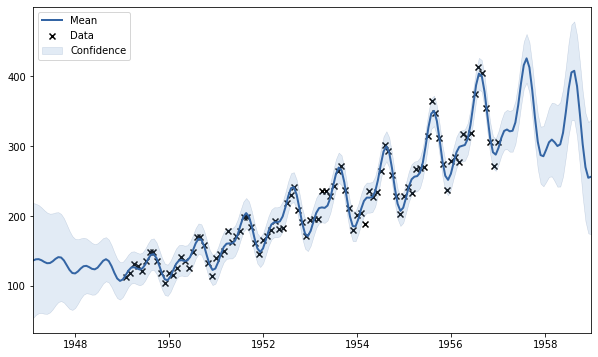

In [81]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)

model.plot(ax=ax)

mlai.write_figure('box-jenkins-spectral-mixture-gp.svg', directory='./gp')

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/box-jenkins-spectral-mixture-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Spectral mixture GP as applied to the Box-Jenkins airline
data.</i>

## Mauna Loa Spectral Mixture

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/mauna-loa-spectral-mixture.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_kern/includes/mauna-loa-spectral-mixture.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [82]:
import pods

In [83]:
data = pods.datasets.mauna_loa()
x = data['X']
y = data['Y']

Using cached version of the data set, to use latest version set refresh_data to True
Most recent data observation from month  7.0  in year  2022.0


In [84]:
import GPy

In [85]:
num_comps = 10
kernel = GPy.kern.ExpQuadCosine(1)
for i in range(num_comps-1):
    kernel += GPy.kern.ExpQuadCosine(1)
kernel+=GPy.kern.Bias(1)
kernel.randomize()
model = GPy.models.GPRegression(x, y, kernel)
#model['.*frequency'] = np.random.uniform(0.0, 6.0, size=model['.*frequency'].shape)
#model['.*bandwidth'] = 2./np.sqrt(np.random.gamma(1.0, 0.5*(X.max()-X.min()), size=model['.*bandwidth'].shape))
#model['.*variance'] = 5.0
#model['.*bias_variance'] = 90000
display(model)

GP_regression.,value,constraints,priors
sum.ExpQuadCosine.variance,0.4029884862989667,+ve,
sum.ExpQuadCosine.lengthscale,0.3585308164676273,+ve,
sum.ExpQuadCosine.period,1.009164706643787,+ve,
sum.ExpQuadCosine_1.variance,0.4007178359198634,+ve,
sum.ExpQuadCosine_1.lengthscale,0.6790982034263746,+ve,
sum.ExpQuadCosine_1.period,1.537166373996536,+ve,
sum.ExpQuadCosine_2.variance,0.2092329154021141,+ve,
sum.ExpQuadCosine_2.lengthscale,0.8751836440567959,+ve,
sum.ExpQuadCosine_2.period,0.899774937098243,+ve,
sum.ExpQuadCosine_3.variance,0.5741027207567562,+ve,


Now we optimize the model.

In [86]:
model.optimize(messages=True)

In [87]:
display(model)

GP_regression.,value,constraints,priors
sum.ExpQuadCosine.variance,6.1900645404871635e-09,+ve,
sum.ExpQuadCosine.lengthscale,439.4398004442397,+ve,
sum.ExpQuadCosine.period,167.56381188801956,+ve,
sum.ExpQuadCosine_1.variance,628.0549178023139,+ve,
sum.ExpQuadCosine_1.lengthscale,429.2904746648922,+ve,
sum.ExpQuadCosine_1.period,138.6080532870265,+ve,
sum.ExpQuadCosine_2.variance,404.34600789365993,+ve,
sum.ExpQuadCosine_2.lengthscale,1253.734554448855,+ve,
sum.ExpQuadCosine_2.period,481.2165141608626,+ve,
sum.ExpQuadCosine_3.variance,489.19879515376164,+ve,


In [88]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

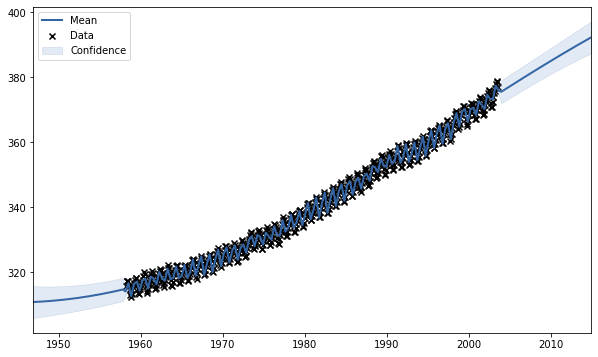

In [89]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)

model.plot(ax=ax)

mlai.write_figure('mauna-loa-spectral-mixture-gp.svg', directory='./gp')

<img src="https://mlatcl.github.io/gpss/./slides/diagrams//gp/mauna-loa-spectral-mixture-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Spectral mixture GP as applied to the Mauna Loa Observatory
carbon dioxide concentration data.</i>

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References

Bochner, S., 1959. Lectures on Fourier integrals. Princeton University
Press.

Box, G.E.P., Jenkins, G.M., 1976. Time series analysis: Forecasting and
control. Holden-Day.

Keeling, C.D., Bacastow, R.B., Bainbridge, A.E., Ekdahl Jr., C.A.,
Guenther, P.R., Waterman, L.S., Chin, J.F.S., 1976. Atmospheric carbon
dioxide variations at Mauna Loa Observatory, Hawaii. Tellus 28, 538–551.
<https://doi.org/10.1111/j.2153-3490.1976.tb00701.x>

Rasmussen, C.E., Williams, C.K.I., 2006. Gaussian processes for machine
learning. mit, Cambridge, MA.

Stein, M.L., 1999. Interpolation of spatial data: Some theory for
Kriging. springer.

Thoning, K.W., Tans, P.P., Komhyr, W.D., 1989. Atmospheric carbon
dioxide at Mauna Loa Observatory: 2. Analysis of the NOAA GMCC data,
1974–1985. Journal of Geophysical Research: Atmospheres 94, 8549–8565.
<https://doi.org/10.1029/JD094iD06p08549>